## Analysis of SPY

Fall 2024 Data Science Project

Elizabeth Ipe: Contributed 100% to all sections.

Matthew Welling: Contributed 100% to all sections.

Nadia Meyerovich: Contributed 100% to all sections.

Parsa Sedghi: Contributed 100% to all sections.

Satya Shah: Contributed 100% to all sections.

### Introduction

The SPY ETF, also known as the SPDR S&P 500 ETF Trust, is an extremely popular exchange-traded fund (ETF). ETFs are pooled investments that can be traded the same way as individual stocks. Users of ETFs purchase shares of the fund itself, which in turn owns shares of a group of companies. The benefits of ETFs for investors are that they can spread their assets across a group of companies or industries, decreasing volatility and preventing major losses on the initial investment. In contrast, individual stocks can be volatile, offering the chance for greater gains at the risk of greater losses. The SPY ETF tracks the performance of the S&P 500, which refers to the 500 largest publicly traded companies in the United States. The total value of the S&P 500 grows or shrinks with the economy, so as long as economic conditions are improving, investors can be confident that purchasing shares of SPY will provide a positive return on investment over time.

For years, financial analysts, investors, and business owners have sought accurate methods to predict changes in stock prices over time. The value of a stock varies greatly depending on company performance, socio political events, and general economic variations. Gaining the ability to accurately predict the change in a stock’s value would give an investor a massive advantage in trading and allow them to boost their profits. Even for a less volatile investment, such as SPY, being able to predict the value of a share would allow an investor to know the best times to buy and sell in order to make the most money.
For our project, we wanted to see if it was possible to predict the value of SPY over time. We applied our knowledge of machine learning to create a model that would potentially accomplish this goal. Succeeding would mean that we would be able to make more informed investment decisions and maximize our returns.

Further reading on SPY and the S&P500:
https://www.investopedia.com/articles/investing/122215/spy-spdr-sp-500-trust-etf.asp
https://www.forbes.com/advisor/investing/what-is-sp-500/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Curation

Data: Yahoo Finance Daily Stock Prices, free and thousands of different data sets we can download
Inputs: Company, Price High, Low, Close, and Volume Traded for each day
From the past 3 Years (10/4/2021 - 10/1/2024)
https://finance.yahoo.com/quote/%5EGSPC/history/

Our SPY ETF data will allow us to observe the daily prices per share, the daily trading activity, and by extension the performance of the S&P 500 as a whole. Our dataset contains measurements of SPY value and activity each day from September 2021 to September 2024. The dataset includes daily opening, closing, low, and high prices per share, along with daily volume measurements. We will use our data to analyze both trends in the stock prices and volume over large periods of time, and also variations within individual days.

### Initial Data Description

Our SPY ETF data will allow us to observe the daily prices per share, the daily trading activity, and by extension the performance of the S&P 500 as a whole. Our dataset contains measurements of SPY value and activity each day from September 2021 to September 2024. The dataset includes daily opening, closing, low, and high prices per share, along with daily volume measurements. We will use our data to analyze both trends in the stock prices and volume over large periods of time, and also variations within individual days.

In [ ]:
df = pd.read_csv('SPY_Data.csv')

First, we need to clean up the data. Some of the date formats are not correct, so let's make them all standard into a datetime format.

In [ ]:
df["Volume"] = df["Volume"].str.replace(',', '').astype(int)
df['Date'] = pd.to_datetime(df['Date'])

We also want more columns. It might be helpful if we have the difference in the high and low to see the total change over one day, and the difference in open and close to see how things changed strictly forward over time. Sometimes, the difference of close-open might be negative, which means the price of the stock decreased.

In [ ]:
df['High-Low'] = df['High'] - df['Low']
df['Close-Open'] = df['Close'] - df['Open']

We want to see a more standardized approach to the difference between rows, so let's calculate percent change between each of the rows for all the columns relevant to the prices over time.

In [ ]:
df['pct_change_high'] = df['High'].pct_change()
df['pct_change_low'] = df['Low'].pct_change()
df['pct_change_close'] = df['Close'].pct_change()
df['pct_change_open'] = df['Open'].pct_change()

In [ ]:
df

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
0,2024-10-01,573.40,574.06,566.00,568.62,72668781,8.06,-4.78,NaN,NaN,NaN,NaN
1,2024-09-30,570.42,574.38,568.08,573.76,63655449,6.30,3.34,0.000557,0.003675,0.009039,-0.005197
2,2024-09-27,573.39,574.22,570.42,571.47,42100930,3.80,-1.92,-0.000279,0.004119,-0.003991,0.005207
3,2024-09-26,574.38,574.71,569.90,572.30,48336000,4.81,-2.08,0.000853,-0.000912,0.001452,0.001727
4,2024-09-25,571.14,571.89,568.91,570.04,38428594,2.98,-1.10,-0.004907,-0.001737,-0.003949,-0.005641
...,...,...,...,...,...,...,...,...,...,...,...,...
748,2021-10-08,439.48,439.89,437.19,437.86,74557398,2.70,-1.62,-0.000840,0.005913,0.007293,0.005307
749,2021-10-07,438.39,441.68,438.20,438.66,72437508,3.48,0.27,0.004069,0.002310,0.001827,-0.002480
750,2021-10-06,429.27,435.12,427.54,434.90,113032203,7.58,5.63,-0.014852,-0.024327,-0.008572,-0.020803
751,2021-10-05,430.24,435.49,429.39,433.10,90682523,6.10,2.86,0.000850,0.004327,-0.004139,0.002260


To get an idea of what our dataset’s prices look like over time as a whole, let’s first graph our four price measurements: Open, Close, High, and Low. Our data was measured from September 2021 to September 2024. We can see that all four prices roughly decrease from 2022 to the start of 2023, then increase over the course of 2023 and 2024.

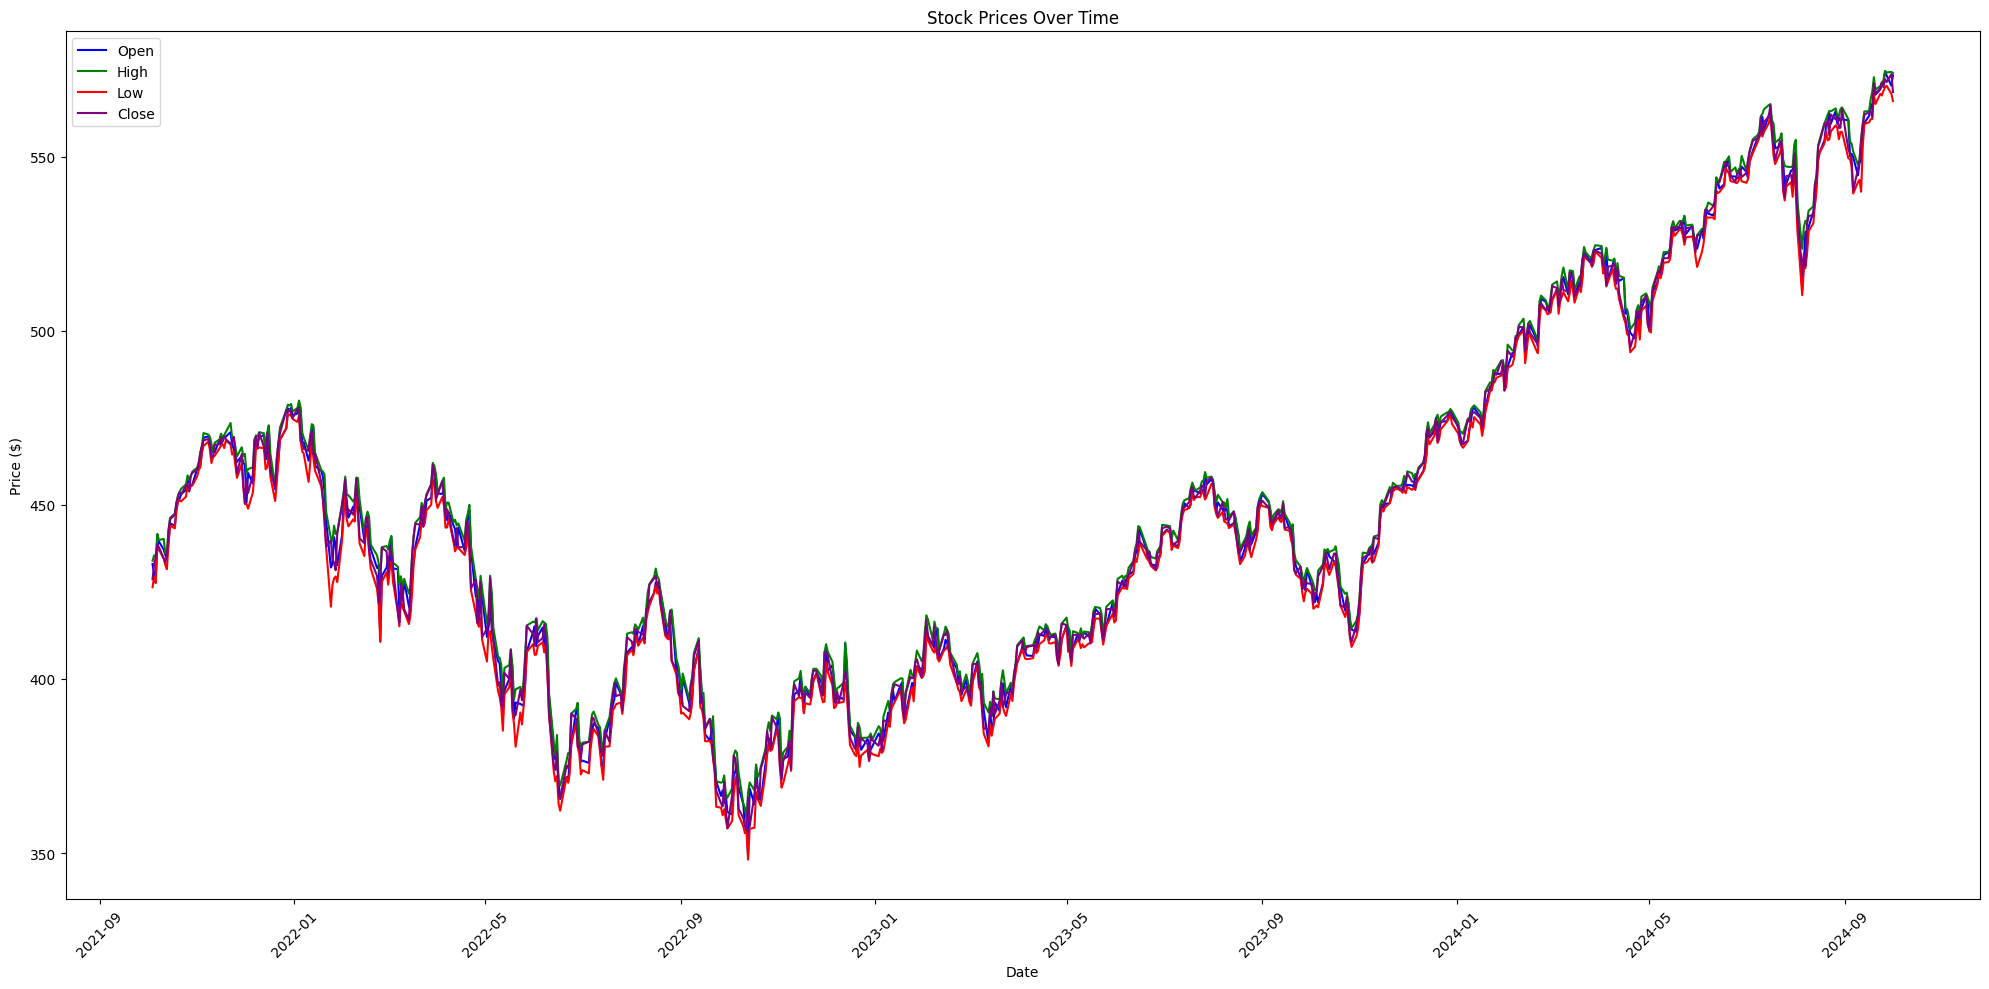

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"],  label='Open', color='blue')
plt.plot(df["Date"], df["High"],  label='High', color='green')
plt.plot(df["Date"], df["Low"], label='Low', color='red')
plt.plot(df["Date"], df["Close"], label='Close', color='purple')

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Now, let’s take a look specifically at the daily prices at opening, represented by our ‘Open’ data. The data represents the value of a share of the SPY ETF at the time that the stock market opens every day. This provides a daily starting measure of the stock, and when combined with our other data, we can see how the price changes over the course of the day.

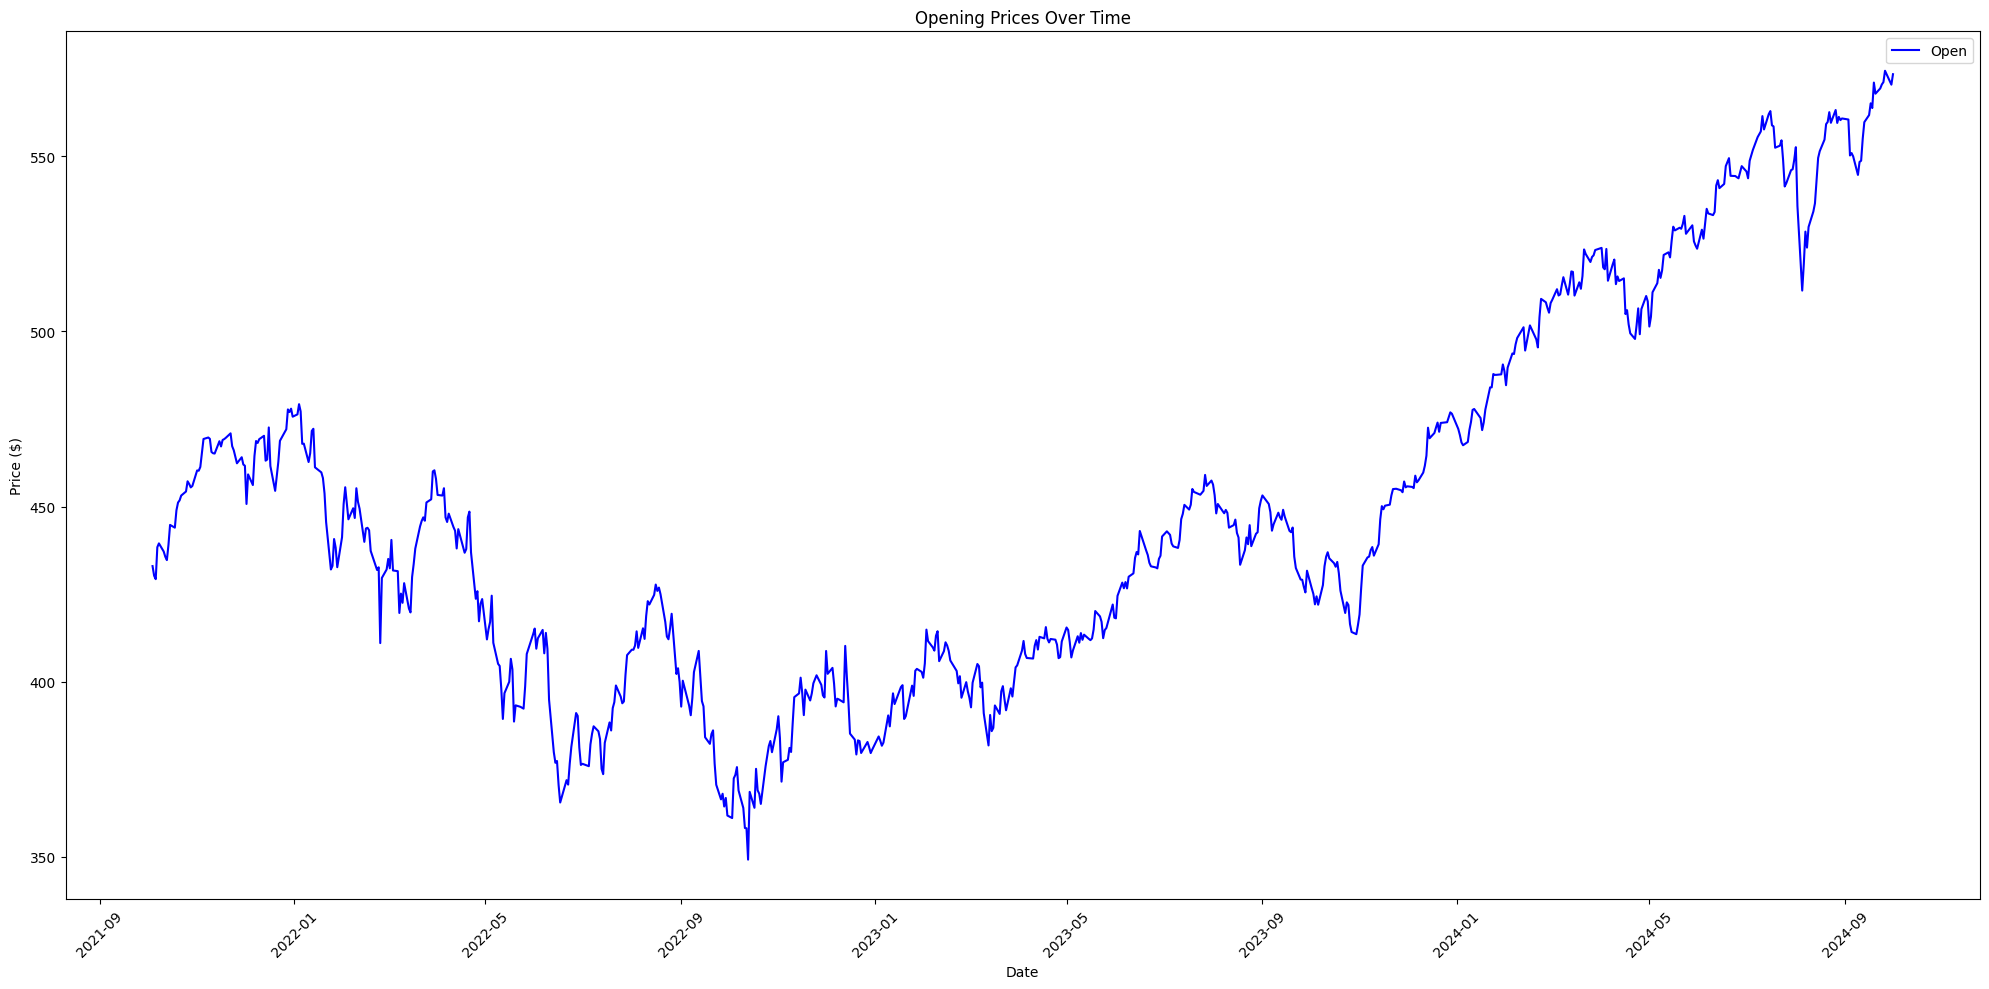

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"],  label='Open', color='blue')

plt.title("Opening Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The ‘High’ data represents the highest value that a share of the SPY ETF reaches in a given day. The price of a share can fluctuate greatly throughout a single day, so understanding the maximum value SPY attains in a day can help us understand the overall performance of the S&P 500 that day.

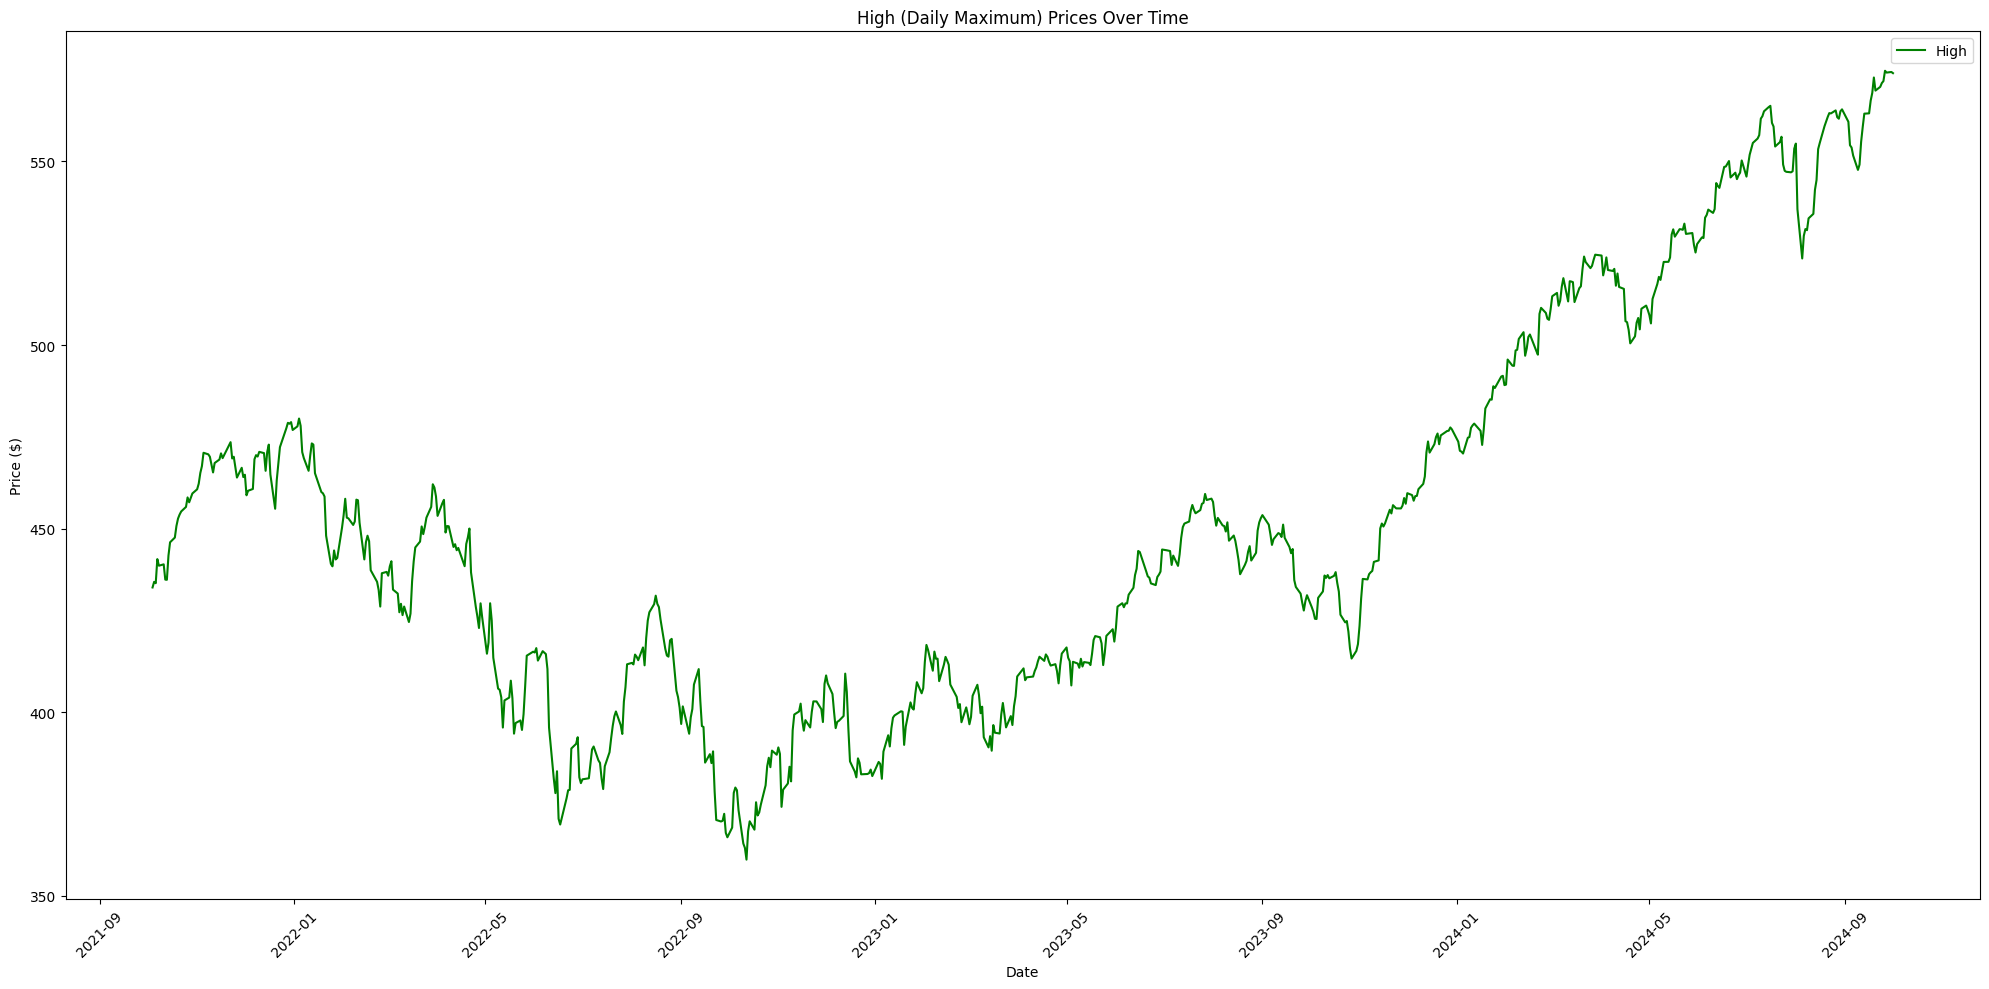

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["High"],  label='High', color='green')

plt.title("High (Daily Maximum) Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Similarly, the ‘Low’ data represents the lowest value reached for each share of the SPY ETF in a given day. The difference between the High and Low values gives us the total fluctuation in the value of a share within a day.

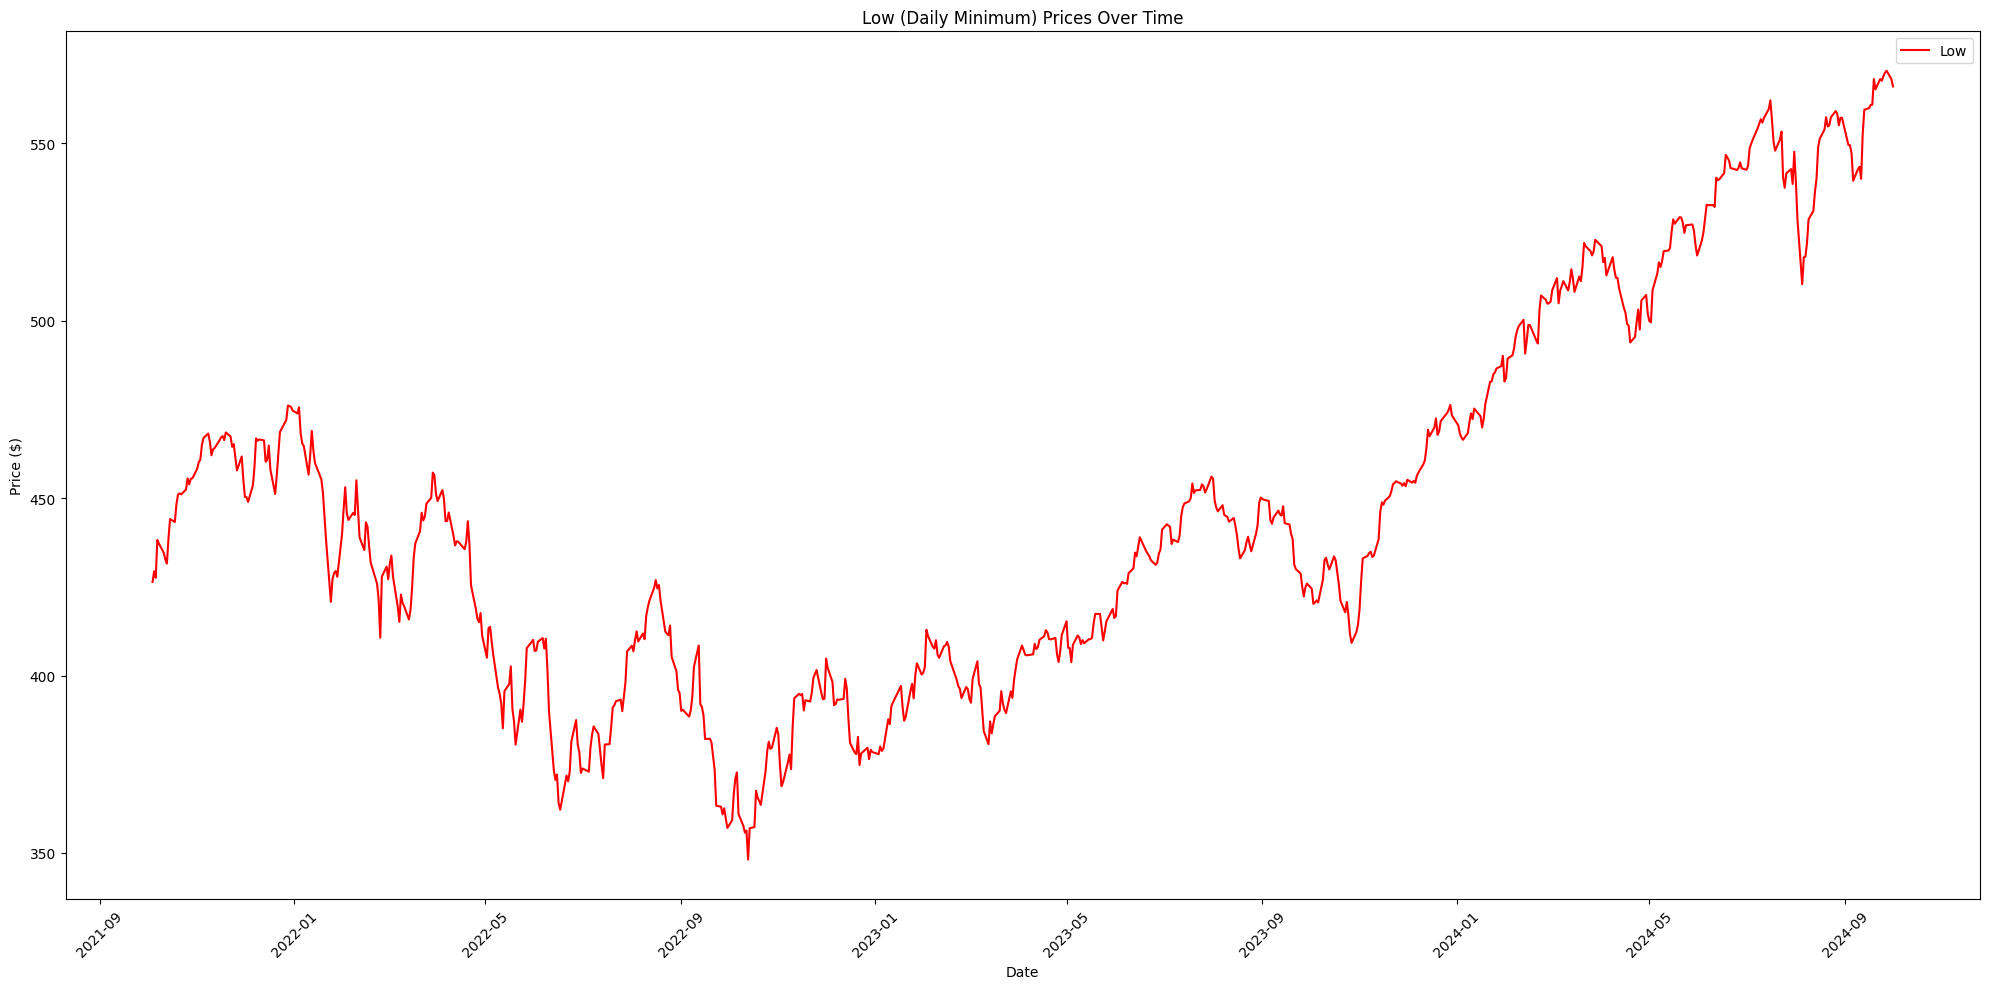

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Low"], label='Low', color='red')

plt.title("Low (Daily Minimum) Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

For our last price measurement, the ‘Close’ data gives us the value of a SPY ETF share at the time that the markets close each day. The change between Close and Open shows us how much the value of a share changed between the beginning and ending of the day.

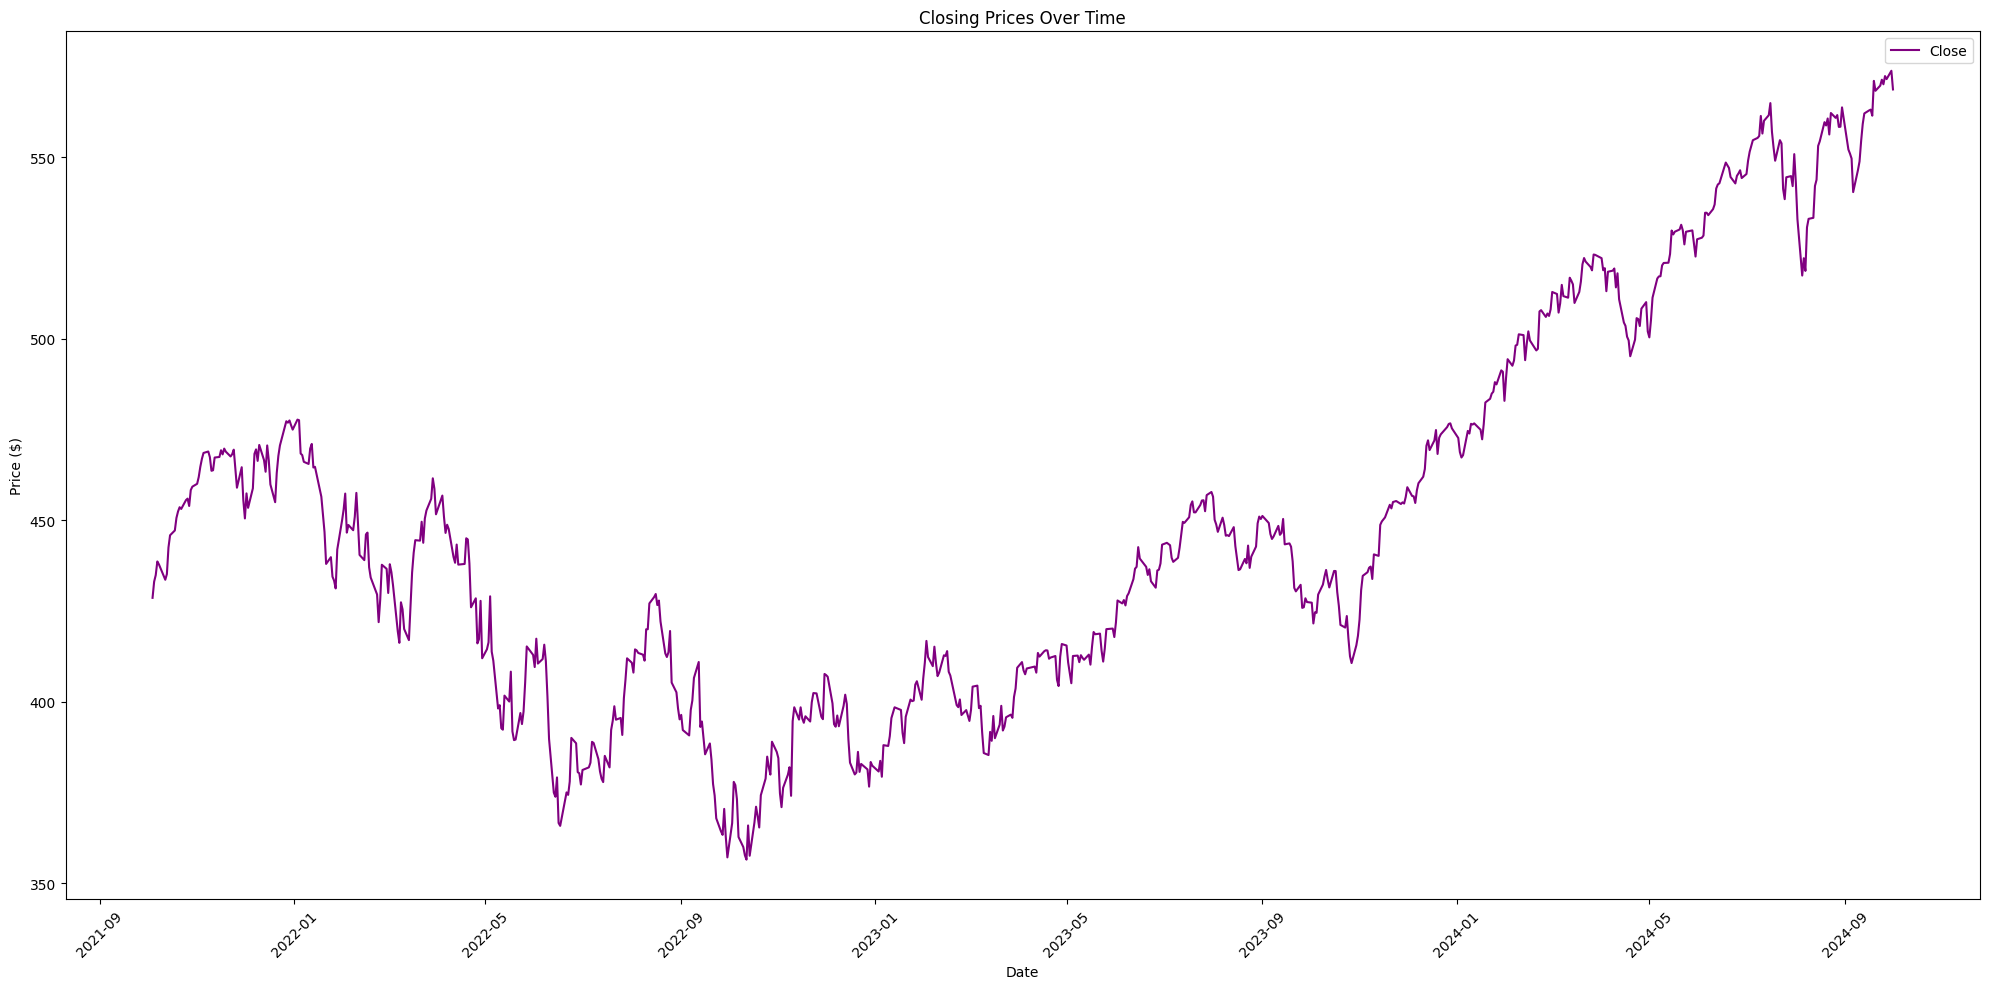

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"], label='Close', color='purple')

plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Another important measurement that provides insights into the performance of SPY is the volume. The volume represents the total number of shares traded in a given day. This involves both the purchasing and selling of shares. The measurement gives us an idea about how much activity is occurring in a day, which can fluctuate greatly based on global, political, or financial events. The data appears to fluctuate over time without any clear trajectory, however individual changes to the volume value are usually due to specific factors that make people more likely to want to trade on a given day. For example, if major companies in the S&P are experiencing severe financial troubles, investors may be more likely to sell their shares of SPY. It is important to note, however, that since SPY represents an investment in a large basket of companies, volume tends to be less volatile than for the stocks of individual companies.

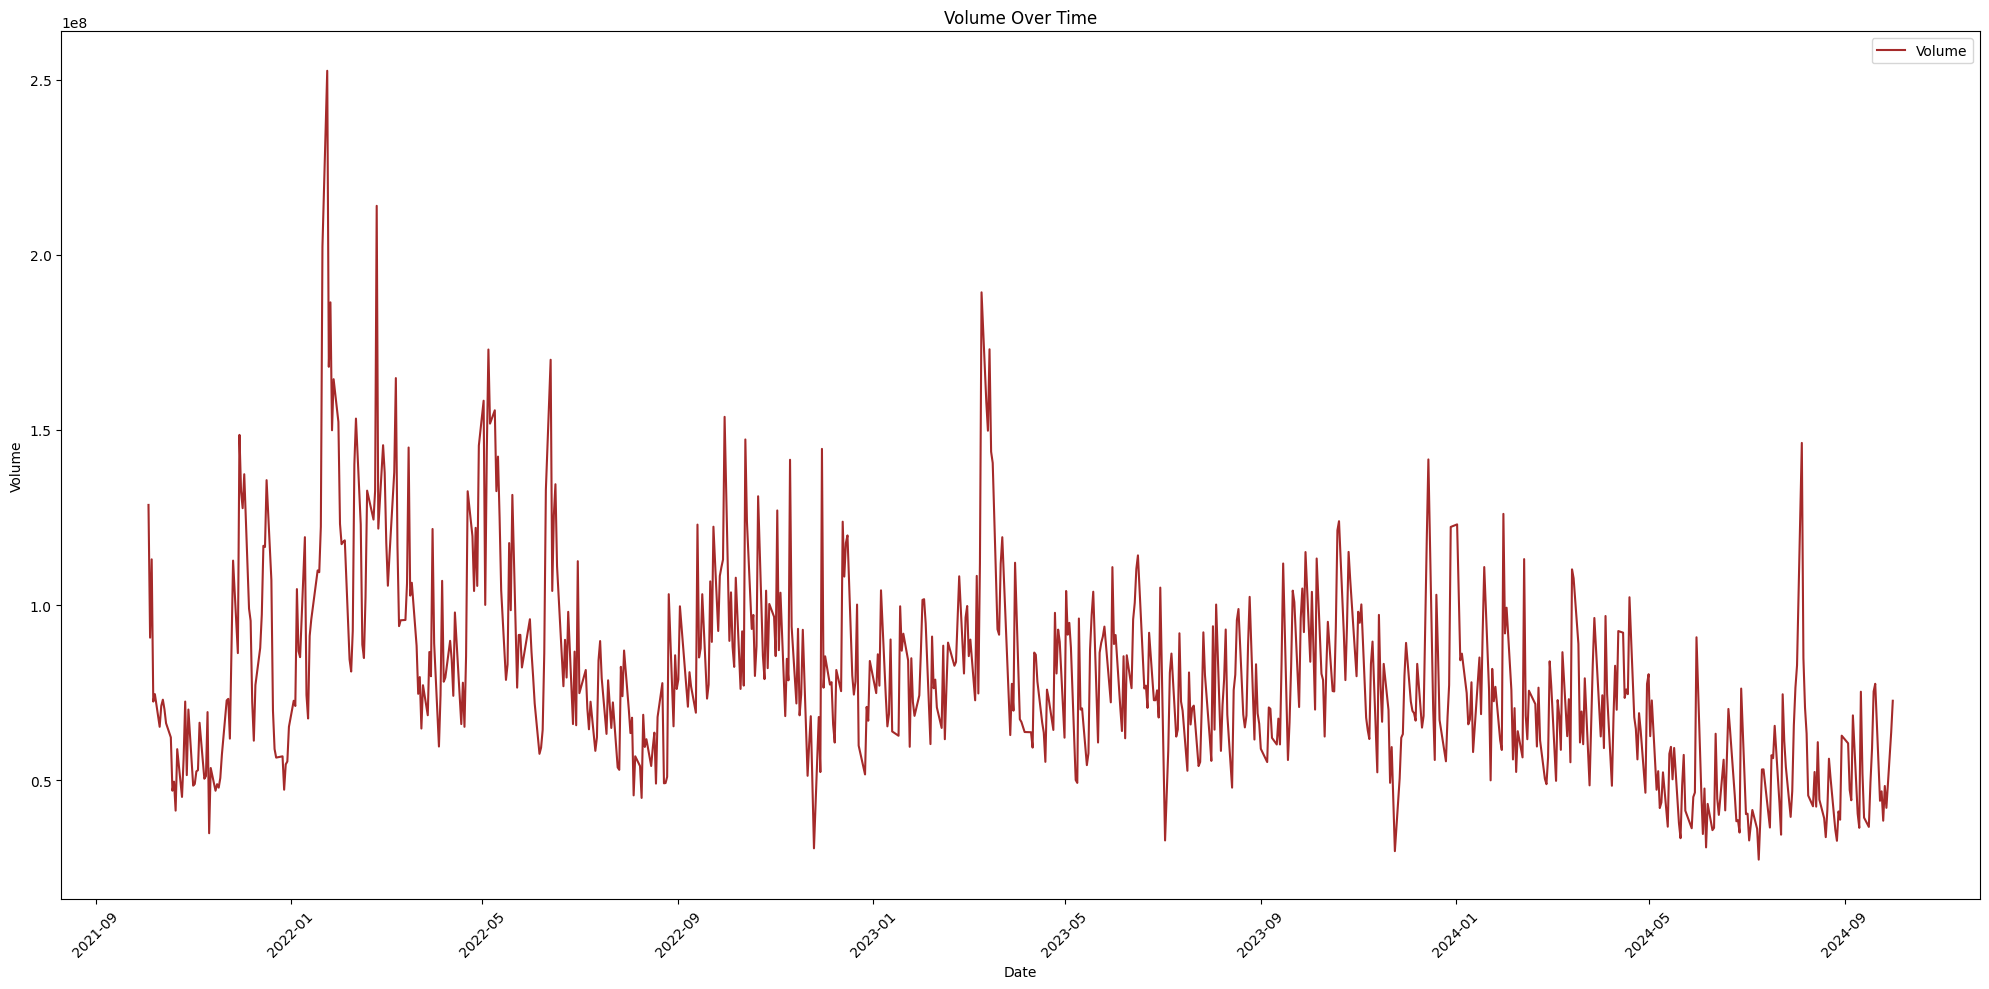

In [ ]:
# Line Plot of Open, High, Low, and Close Prices
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Volume"], label='Volume', color='brown')

plt.title("Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

Before diving into the in-depth analysis and application of machine learning to our dataset, it is important to take a look at the basic features of our data. First, we want to look at the number of features, the number of null and non-null entries, and the types of each piece of data. We also quickly look at the head and tail of our dataset to get an idea about how a typical entry will look. Next, we observe summary statistics of our dataset. We see that the mean for each price-related feature (High, Low, Close, Open) hovers around 450 dollars per share. The minimum to maximum range is about 350 to 575 dollars per share over the course of our measurement period. We can see, once again, that volume varies wildly over time and has vastly different minimum and maximum values. This exploratory data analysis gives us a good idea of what to expect when analyzing the features of our dataset in more detail later on.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              753 non-null    datetime64[ns]
 1   Open              753 non-null    float64       
 2   High              753 non-null    float64       
 3   Low               753 non-null    float64       
 4   Close             753 non-null    float64       
 5   Volume            753 non-null    int64         
 6   High-Low          753 non-null    float64       
 7   Close-Open        753 non-null    float64       
 8   pct_change_high   752 non-null    float64       
 9   pct_change_low    752 non-null    float64       
 10  pct_change_close  752 non-null    float64       
 11  pct_change_open   752 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 70.7 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
0,2024-10-01,573.40,574.06,566.00,568.62,72668781,8.06,-4.78,NaN,NaN,NaN,NaN
1,2024-09-30,570.42,574.38,568.08,573.76,63655449,6.30,3.34,0.000557,0.003675,0.009039,-0.005197
2,2024-09-27,573.39,574.22,570.42,571.47,42100930,3.80,-1.92,-0.000279,0.004119,-0.003991,0.005207
3,2024-09-26,574.38,574.71,569.90,572.30,48336000,4.81,-2.08,0.000853,-0.000912,0.001452,0.001727
4,2024-09-25,571.14,571.89,568.91,570.04,38428594,2.98,-1.10,-0.004907,-0.001737,-0.003949,-0.005641


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
748,2021-10-08,439.48,439.89,437.19,437.86,74557398,2.70,-1.62,-0.000840,0.005913,0.007293,0.005307
749,2021-10-07,438.39,441.68,438.20,438.66,72437508,3.48,0.27,0.004069,0.002310,0.001827,-0.002480
750,2021-10-06,429.27,435.12,427.54,434.90,113032203,7.58,5.63,-0.014852,-0.024327,-0.008572,-0.020803
751,2021-10-05,430.24,435.49,429.39,433.10,90682523,6.10,2.86,0.000850,0.004327,-0.004139,0.002260
752,2021-10-04,433.00,433.96,426.36,428.64,128570000,7.60,-4.36,-0.003513,-0.007057,-0.010298,0.006415


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
count,753,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000,753.000000,752.000000,752.000000,752.000000,752.000000
mean,2023-04-02 12:18:10.039841024,448.402537,451.117703,445.519097,448.498539,8.037530e+07,5.598606,0.096003,-0.000328,-0.000326,-0.000314,-0.000311
min,2021-10-04 00:00:00,349.210000,359.820000,348.110000,356.560000,2.731413e+07,0.770000,-14.080000,-0.035186,-0.040247,-0.052092,-0.052476
25%,2022-07-05 00:00:00,407.580000,410.490000,405.020000,408.020000,6.174603e+07,3.420000,-2.020000,-0.005544,-0.006044,-0.006973,-0.007001
50%,2023-04-03 00:00:00,439.480000,442.970000,437.220000,439.640000,7.575710e+07,4.860000,0.290000,-0.001158,-0.000766,-0.000542,-0.000988
75%,2024-01-02 00:00:00,475.440000,477.060000,473.300000,476.160000,9.355980e+07,6.990000,2.470000,0.004494,0.005142,0.005660,0.005119
max,2024-10-01 00:00:00,574.380000,574.710000,570.420000,573.760000,2.524967e+08,19.620000,17.280000,0.040325,0.044066,0.045459,0.052650
std,NaN,53.154062,52.746088,53.388004,53.092185,2.875236e+07,2.946807,3.900274,0.009389,0.010100,0.011128,0.011192


In [ ]:
df.count()

,0
Date,753
Open,753
High,753
Low,753
Close,753
Volume,753
High-Low,753
Close-Open,753
pct_change_high,752
pct_change_low,752


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
High-Low,float64
Close-Open,float64
pct_change_high,float64
pct_change_low,float64


Now that we have processed our data and analyzed some basic summary statistics, we want to understand differences, similarities, and relationships between our variables. We can discover these qualities through hypothesis testing. We will start by performing T-Test and ANOVA analysis.

#### Conclusion One: T-test

The T-Test measures the significance of the difference in the means of two variables. Here, we analyze the difference between the means of the open and close prices to determine how stable the price of a share of the SPY ETF is over the course of a day. Our null hypothesis is that the means of the two measures will not be significantly different, and our alternative hypothesis is that the means will be significantly different.

**Hypothesis Test 1: **Relationship between mean of open prices and mean of close prices****

H_0: The mean of the open prices is equal to the mean of the close prices.

H_1: The mean of the open prices is not equal to the mean of the close prices.

T-statistic: -0.675
P-value: 0.500


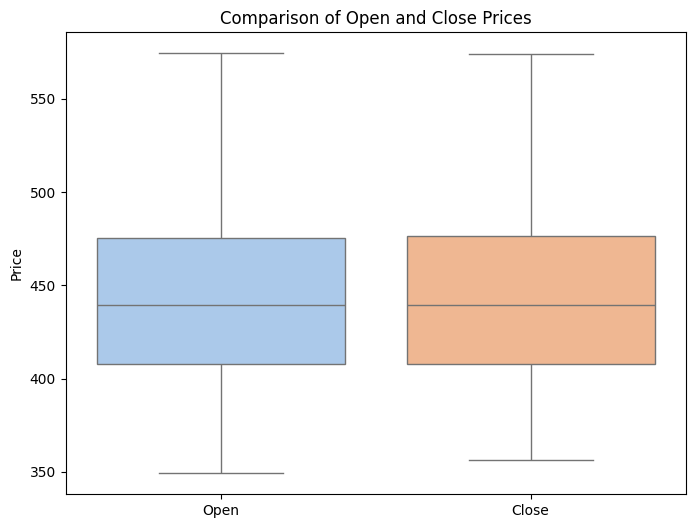

In [ ]:
t_stat, p_value = stats.ttest_rel(df['Open'], df['Close'])
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Create a box plot for Open and Close prices
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Open', 'Close']], palette="pastel")
plt.title("Comparison of Open and Close Prices")
plt.ylabel("Price")
plt.show()

**Hypothesis 1 Conclusion**

Since the p-value is 0.500, there is no statistical significance between the open and close prices. Therefore, there is not enough information to reject the null hypothesis. This implies that, on average, the stock's open and close prices are quite similar, suggesting relative stability in the stock's price during each trading day.

#### Conclusion Two: ANOVA

The ANOVA test compares the means of three or more variables. We use ANOVA here to analyze if the year has a significant impact on the value of the volume. This would give us an insight into whether or not the mean value of volume changes significantly from year to year, which could mean that global or financial events within that year affected the trading volume. Our null hypothesis is that volume is not dependent on the year, and our alternative hypothesis is that the year does impact the volume.

**Hypothesis Test 2A: Relationship Between Year and Volume Mean**

H_O: The year does not affect the mean of the volume.

H_a: The year does affect the mean of the volume.

F-statistic: 61.896
P-value: 0.000000


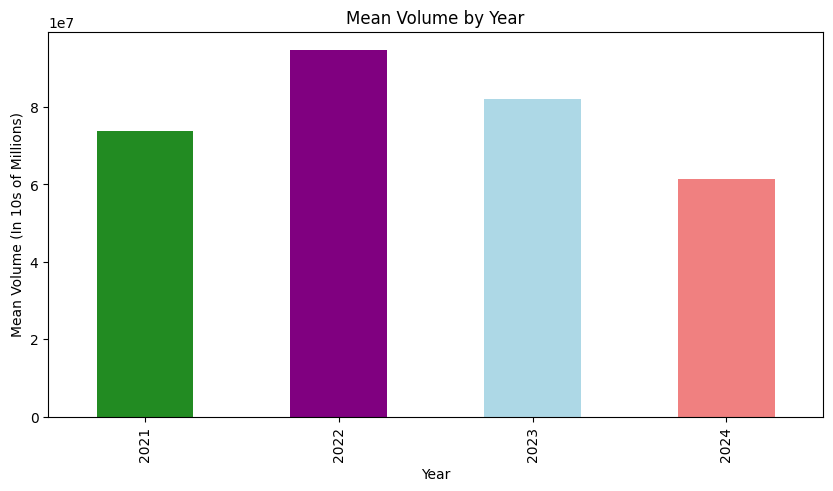

In [ ]:
# ANOVA Testing

df_2021 = df[df['Date'].dt.year == 2021]
df_2022 = df[df['Date'].dt.year == 2022]
df_2023 = df[df['Date'].dt.year == 2023]
df_2024 = df[df['Date'].dt.year == 2024]

f_stat, p_val = stats.f_oneway(df_2021['Volume'], df_2022['Volume'], df_2023['Volume'], df_2024['Volume'])
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:3f}")

# Creating a bar chart of the volume means based on year

df['Year'] = df['Date'].dt.year
volume_means = df.groupby('Year')['Volume'].mean()

volume_means.plot(kind = 'bar', figsize = (10, 5), color = ['forestgreen', 'purple',
                                                            'lightblue', 'lightcoral'])
plt.title('Mean Volume by Year')
plt.xlabel('Year')
plt.ylabel('Mean Volume (In 10s of Millions)')
plt.show()

df = df.drop(columns = ['Year'])


**Hypothesis Test 2A Conclusion**

Conducting the ANOVA test resulted in a p-value of 0.0, meaning that the p-value is so close to 0 that the figure was rounded down by the test function. Since the p-value is less than the significance level of 0.05, the probability of the results being observed under the null hypothesis is extremely low. Therefore, we can safely reject the null hypothesis and conclude that the year does affect the volume mean. This conveys that the mean amount of stocks being bought and sold each day do have a specific relationship with the year.

**Hypothesis Test 2B: Relationship Between Close Prices and Volume Means**

The ANOVA test compares the means of three or more variables. We use ANOVA here to analyze if the close price has a significant impact on the value of the volume. This would give us an insight into whether or not the mean value of volume changes significantly based on different prices, which could explain trading habits of individuals. Our null hypothesis is that volume is not dependent on the close price, and our alternative hypothesis is that the close price does impact the volume.

H_O: The close price does not affect the mean of the volume.

H_a: The close price does affect the mean of the volume.

<ipython-input-67-9438d9912b6d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_means_by_price = df.groupby('Close_Category')['Volume'].mean()


F-statistic: 55.397
P-value: 0.000000


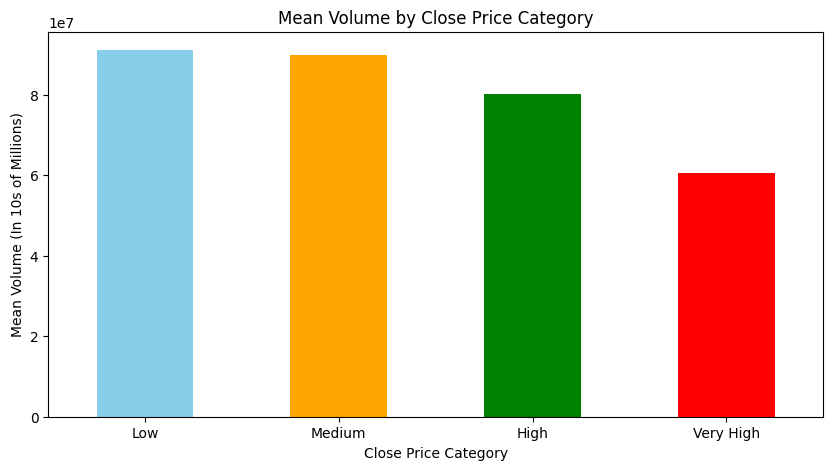

In [ ]:
# ANOVA Testing

price_bins = pd.qcut(df['Close'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Close_Category'] = price_bins
volume_means_by_price = df.groupby('Close_Category')['Volume'].mean()

groups = [df[df['Close_Category'] == category]['Volume'] for category in df['Close_Category'].unique()]
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.6f}")

# Creating a bar chart of the volume means based on low, medium, high, and very high close prices

volume_means_by_price.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Mean Volume by Close Price Category')
plt.xlabel('Close Price Category')
plt.ylabel('Mean Volume (In 10s of Millions)')
plt.xticks(rotation=0)
plt.show()

df = df.drop(columns=['Close_Category'])

**Hypothesis Test 2B Conclusion**

Conducting the ANOVA test resulted in a p-value of 0.0, meaning that the p-value is so close to 0 that the figure was rounded down by the test function. Since the p-value is less than the significance level of 0.05, the probability of the results being observed under the null hypothesis is extremely low. Therefore, we can safely reject the null hypothesis and conclude that the close price does affect the volume mean. This conveys that the mean amount of stocks being bought and sold each day do have a specific relationship with the close price.

#### Conclusion Three: Outlier Detection

It’s really important for us to know whether any data points in our data are irregular. These data points could affect the analysis we do and the conclusions we make. For this reason, we need to analyze whether or not there are outliers in our data. Here, we will perform outlier detection and make conclusions about whether there are outliers by using the z-score formula.

In [ ]:
df[(np.abs(stats.zscore(df['Open'])) > 3)]

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open


There are no outliers in the Open column.

In [ ]:
df[(np.abs(stats.zscore(df['Close'])) > 3)]


,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open


There are no outliers in the Close column.

In [ ]:
df[(np.abs(stats.zscore(df['High'])) > 3)]

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open


There are no outliers in the High column.

In [ ]:
df[(np.abs(stats.zscore(df['Low'])) > 3)]

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open


There are no outliers in the Low column.

In [ ]:
df[(np.abs(stats.zscore(df['Volume'])) > 3)]

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
389,2023-03-15,385.89,389.49,383.71,389.28,172996891,5.78,3.39,-0.017605,-0.006679,-0.017243,-0.002404
392,2023-03-10,390.99,393.16,384.32,385.91,189252984,8.84,-5.08,0.007095,0.009641,0.001427,0.024043
578,2022-06-13,379.85,381.81,373.30,375.00,170004891,8.51,-4.85,0.010240,0.007313,0.003022,0.007961
604,2022-05-05,424.55,425.00,409.44,413.81,172929109,15.56,-10.74,0.024590,0.009144,0.006005,0.032717
653,2022-02-24,411.02,428.76,410.64,428.30,213942891,18.12,17.28,-0.020738,-0.040247,-0.021588,-0.043272
673,2022-01-26,440.72,444.04,428.86,433.38,186391109,15.18,-7.34,0.005548,-0.001374,0.004962,0.005613
674,2022-01-25,433.06,439.72,427.15,434.47,167997297,12.57,1.41,-0.009729,-0.003987,0.002515,-0.017381
675,2022-01-24,432.03,440.38,420.76,439.84,252496703,19.62,7.81,0.001501,-0.014960,0.012360,-0.002378
676,2022-01-21,445.56,448.06,437.95,437.98,202271203,10.11,-7.58,0.017439,0.040855,-0.004229,0.031317


**Outlier Detection Visual**
Below we created a box plot for each of the stock price columns (Open, High, Low, Close) that identifed any outliers.

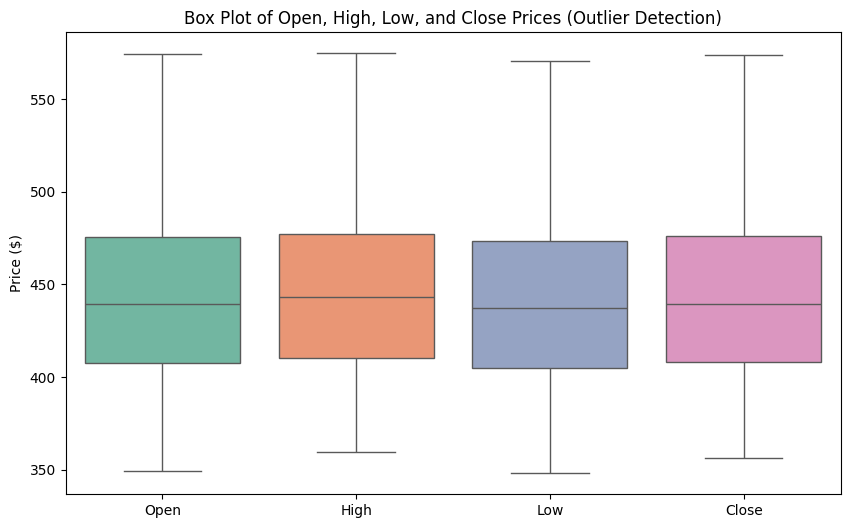

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")

plt.title("Box Plot of Open, High, Low, and Close Prices (Outlier Detection)")
plt.ylabel("Price ($)")
plt.show()


**Outlier Detection Visual**

This is a boxplot we made to also visually represent the outliers for the volumne column as well. From the results below you can see at all of the outliers are past the maximum end of the boxplot.

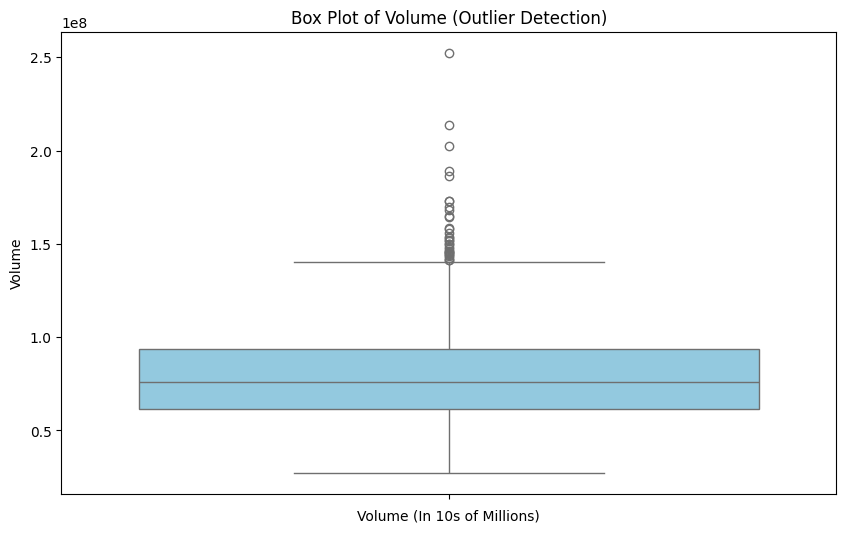

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Volume'], color="skyblue")

plt.title("Box Plot of Volume (Outlier Detection)")
plt.xlabel("Volume (In 10s of Millions)")
plt.show()


**Outlier Detection Conclusion**

There are no outliers in the Open, Close, High, and Low columns. But we did find some outliers in the Volume column.

In conclusion, using both the box plot (IQR method) and Z-score methods for outlier detection provided valuable insights into the dataset. The box plot revealed several high-volume outliers, indicating trading days with significantly larger activity compared to the rest of the dataset. The Z-score method, which identifies data points beyond 3 standard deviations from the mean, highlighted a few key outliers, but fewer than the box plot due to its reliance on the assumption of normal distribution. Together, these methods suggest that while most stock prices remained stable, trading volume experienced occasional spikes, with notable outliers. This comprehensive approach allowed for a deeper understanding of both subtle and extreme deviations in the data.

#### Additional Testing: Pearson Correlation Coefficient

We can also analyze whether any variables are related to each other. A good way to do this is by using the Pearson Correlation Coefficient. The Pearson correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 signifying no correlation; essentially, it tells you how closely two variables tend to move together in a linear fashion. First, we will make a correlation matrix, and then make a visual representation of this matrix to better visualize and understand the relationships in the data.

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,Date,Open,High,Low,Close,Volume,High-Low,Close-Open,pct_change_high,pct_change_low,pct_change_close,pct_change_open
Date,1.000000,0.644639,0.642145,0.649665,0.645861,-0.400067,-0.276108,0.006401,-0.054895,-0.049748,-0.044890,-0.048574
Open,0.644639,1.000000,0.999106,0.998754,0.997305,-0.437498,-0.211269,-0.052544,0.006585,0.015253,0.011819,0.009967
High,0.642145,0.999106,1.000000,0.998531,0.998598,-0.427249,-0.191226,-0.022770,-0.001611,-0.001455,0.011257,-0.015460
Low,0.649665,0.998754,0.998531,1.000000,0.998842,-0.458294,-0.244123,-0.014649,-0.015819,0.005036,0.010660,-0.021424
Close,0.645861,0.997305,0.998598,0.998842,1.000000,-0.446101,-0.221959,0.020857,-0.030670,-0.019177,0.012274,-0.049353
Volume,-0.400067,-0.437498,-0.427249,-0.458294,-0.446101,1.000000,0.655519,-0.110165,0.172979,-0.021429,0.010631,0.116429
High-Low,-0.276108,-0.211269,-0.191226,-0.244123,-0.221959,0.655519,1.000000,-0.142173,0.257007,-0.116944,0.008281,0.111154
Close-Open,0.006401,-0.052544,-0.022770,-0.014649,0.020857,-0.110165,-0.142173,1.000000,-0.506001,-0.467746,0.006040,-0.805697
pct_change_high,-0.054895,0.006585,-0.001611,-0.015819,-0.030670,0.172979,0.257007,-0.506001,1.000000,0.736582,0.672693,0.766984
pct_change_low,-0.049748,0.015253,-0.001455,0.005036,-0.019177,-0.021429,-0.116944,-0.467746,0.736582,1.000000,0.711374,0.731918


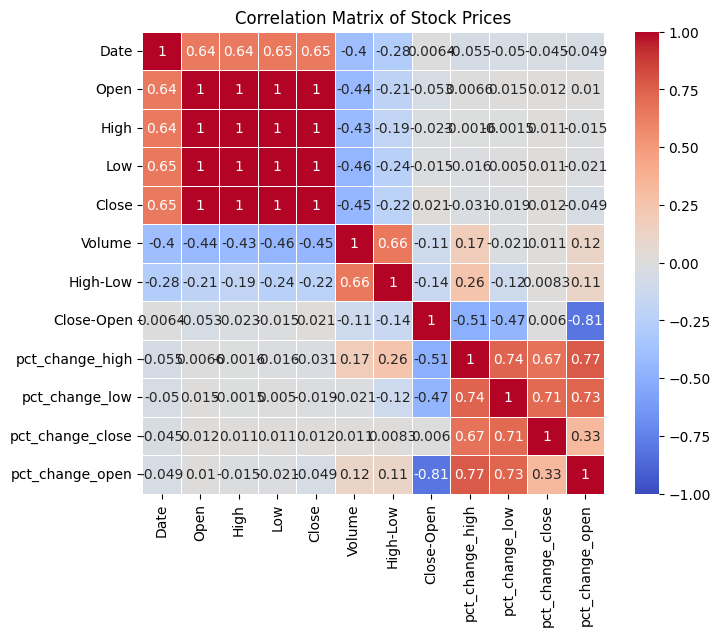

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Stock Prices")
plt.show()

The pearson correlation coefficient measures the linear relationship between two variables. The number 1 indicates a perfect positive linear relationship (perfectly correlated), -1 indicates a perfect negative linear relationship (perfectly anti-correlated), and 0 indicates no linear relationship.

From this we can understand several relationships.

Open and Date (0.64) are positively correlated.

High and Date (0.64) are positively correlated.

Low and Date (0.65) are positively correlated.

Close and Date (0.65) are positively correlated.


Date and Volume (-0.4) are negatively correlated.

Open and Volume (-0.44) are negatively correlated.

High and Volume (-0.43) are negatively correlated.

Low and Volume (-0.46) are negatively correlated.

Close and Volume (-0.45) are negatively correlated.


### Primary Analysis

We chose decision tree regression over a deep neural network (DNN) because while the DNN was able to output a result, it lacked interpretability, making it difficult to understand or visualize how it arrived at its predictions. Decision trees, on the other hand, offer a clear and intuitive structure that makes it easy to visualize and explain the decision-making process. This transparency allows us to identify and rank the importance of features in our dataset, enabling a deeper understanding of the underlying relationships and insights that drive the model's predictions. It also had an overall higher prediction accuracy

We chose not to randomly split the training and testing because we are working with time series data. By splitting the data sequentially rather than randomly, we ensure that the model learns from past patterns to predict future events, preserving the temporal dependencies and trends within the data. Random splitting can lead to data leakage, where information from the future accidentally influences predictions about the past leading to poor generalizations. Maintaining the chronological order allows the model to capture and learn time-dependent patterns such as trends, seasonality, and cyclical behavior effectively.

In [ ]:
percent_split = 0.8
target_column = 'Next-Close-Open'
df[target_column] = df['Close-Open'].shift(1)
train_size = int(len(df) * percent_split)

new_df = df.drop(columns=["Date"]).dropna()

train_df = new_df.iloc[:train_size]
test_df = new_df.iloc[train_size:]

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

In [ ]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [ ]:
test_predictions = clf.predict(X_test)

Below are some calculations to understand just how well the model is doing. The Mean Squared Error (MSE) quantifies the overall model error. The Root Mean Squared Error (RMSE) presents this error in the same units as the target variable. The Mean Absolute Error (MAE) offers a linear score that treats all errors equally and is less sensitive to outliers compared to MSE and RMSE. The R-squared (R2) value represents the proportion of variance in the dependent variable explained by the model, allowing for easy comparison between different models on the same dataset.

In [ ]:
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

print(f"Mean of y_test: {np.mean(y_test)}")
print(f"Standard deviation of y_test: {np.std(y_test)}")
print(f"Mean of test_predictions: {np.mean(test_predictions)}")
print(f"Standard deviation of test_predictions: {np.std(test_predictions)}")

Mean Squared Error (MSE): 9.622851333333337
Root Mean Squared Error (RMSE): 3.1020721031809266
Mean Absolute Error (MAE): 2.186599999999997
R-squared (R2): 0.6053888789800386
Mean of y_test: -0.16113333333333307
Standard deviation of y_test: 4.938183544133973
Mean of test_predictions: -0.45519999999999605
Standard deviation of test_predictions: 4.513693198848742


### Visualization

#### Decision Tree

This visualization displays how the decision tree makes predictions of the close-open value based on attributes of the data. X represents the data that is being used to make the prediction, and the index is which column of the data point is being used in the split.

Columns:
0: Open
1: High
2: Low
3: Close
4: Volume
5: High-Low
6: Close-Open
7: pct_change_high
8: pct_change_low
9: pct_change_close
10: pct_change_open


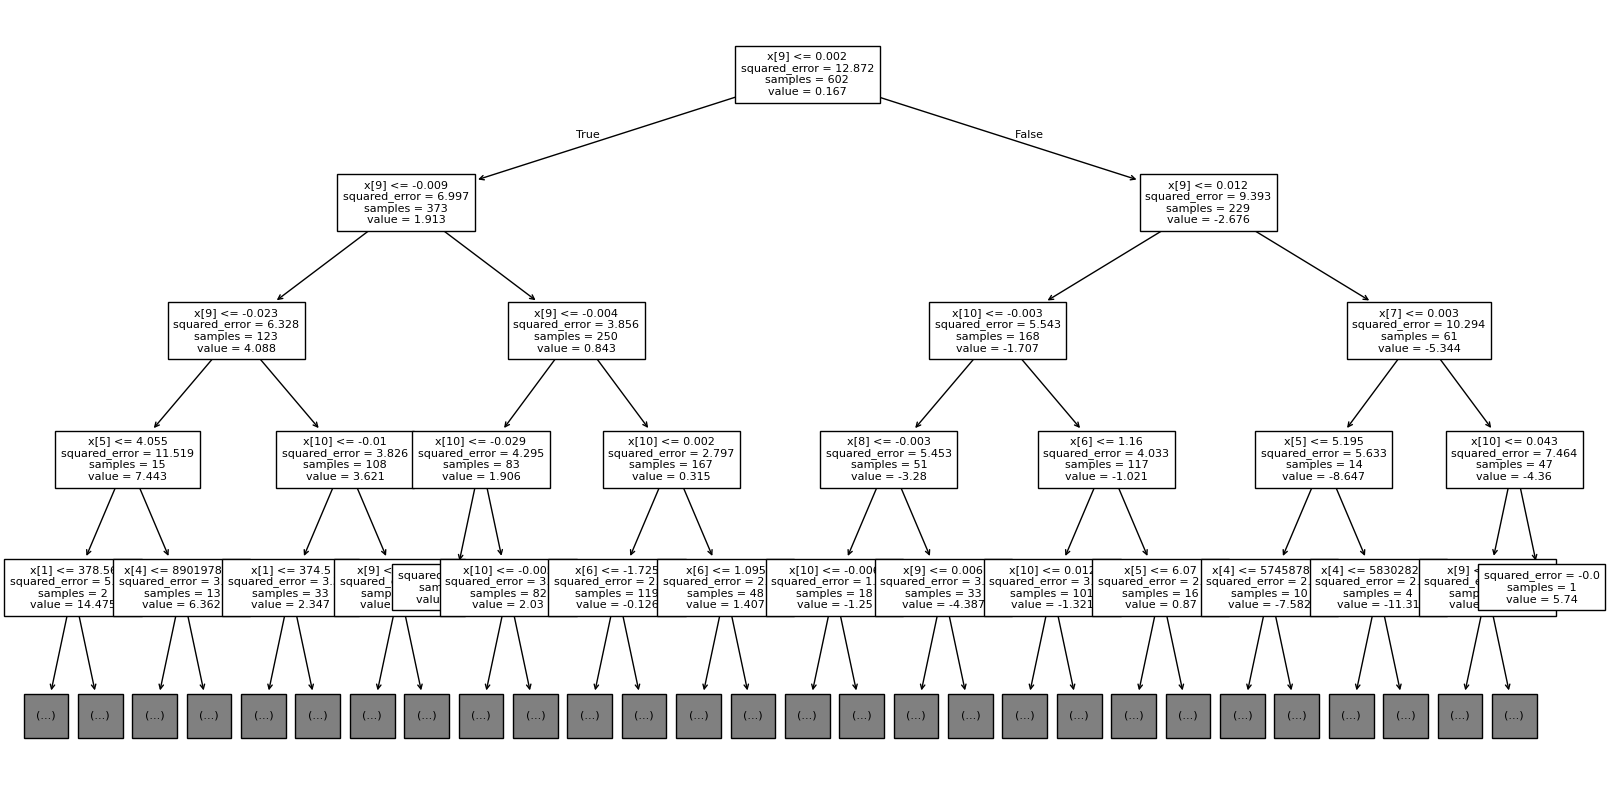

In [ ]:
print("Columns:")
for idx, col in enumerate(X_train.columns):
    print(f"{idx}: {col}")

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, max_depth=4, fontsize = 8)
plt.show()

#### Actual vs. Predicted Values (Line)

This visualization shows the plots for both the actual close-open value as well as the predicted close-open value. The visualization has a line graph which shows the actual values as a blue line, and the predicted values in red as a dotted line. The purpose of this visualization is to understand how well our model can generally predict the values of close-open.

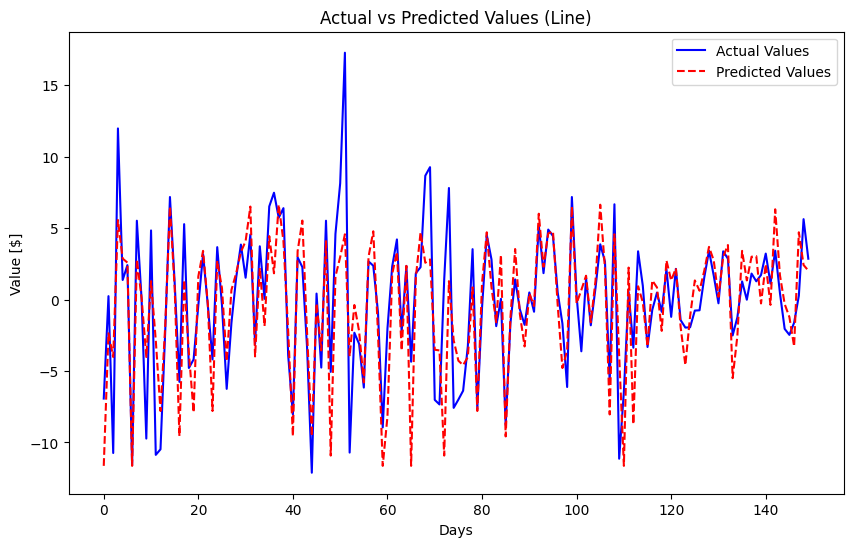

In [ ]:
y_test_array = np.asarray(y_test).astype('float32')
test_predictions_array = np.asarray(test_predictions).astype('float32')

plt.figure(figsize=(10, 6))
plt.plot(y_test_array, label='Actual Values', color='blue', linewidth=1.5)
plt.plot(test_predictions_array, label='Predicted Values', color='red', linestyle='dashed', linewidth=1.5)
plt.title('Actual vs Predicted Values (Line)')
plt.xlabel('Days')
plt.ylabel('Value [$]')
plt.legend()
plt.show()

#### Predicted vs Actual Difference

This bar plot displays the difference between our predicted close-open value and the actual values. The plot helps visualize the error for each day and whether a higher or lower price was predicted.

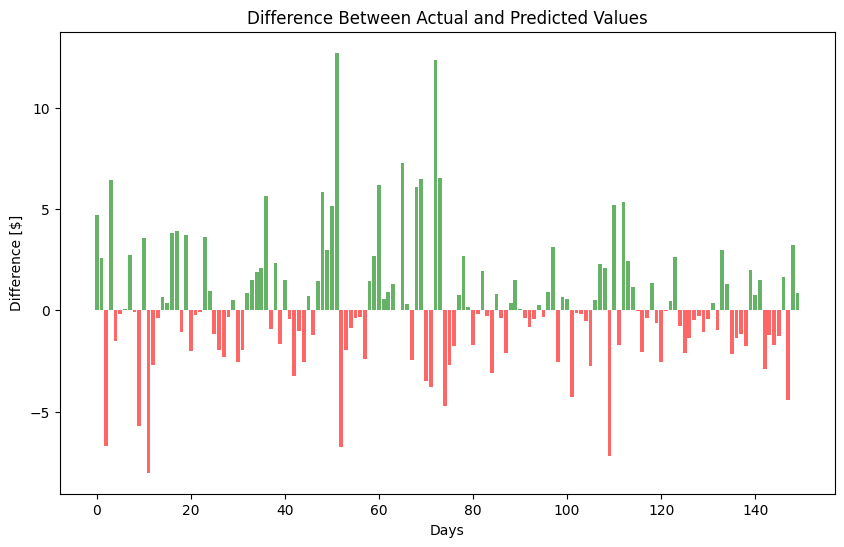

In [ ]:
difference = y_test_array - test_predictions_array.squeeze()
colors = ['green' if diff > 0 else 'red' for diff in difference]
plt.figure(figsize=(10, 6))
plt.bar(range(len(difference)), difference, color=colors, alpha=0.6)
plt.title('Difference Between Actual and Predicted Values')
plt.xlabel('Days')
plt.ylabel('Difference [$]')
plt.show()

#### Predicted vs Actual (Scatter)

The scatter plot represents how far off the predicted values compared to the actual values are from a “perfect” prediction, which is represented by the dotted orange line.

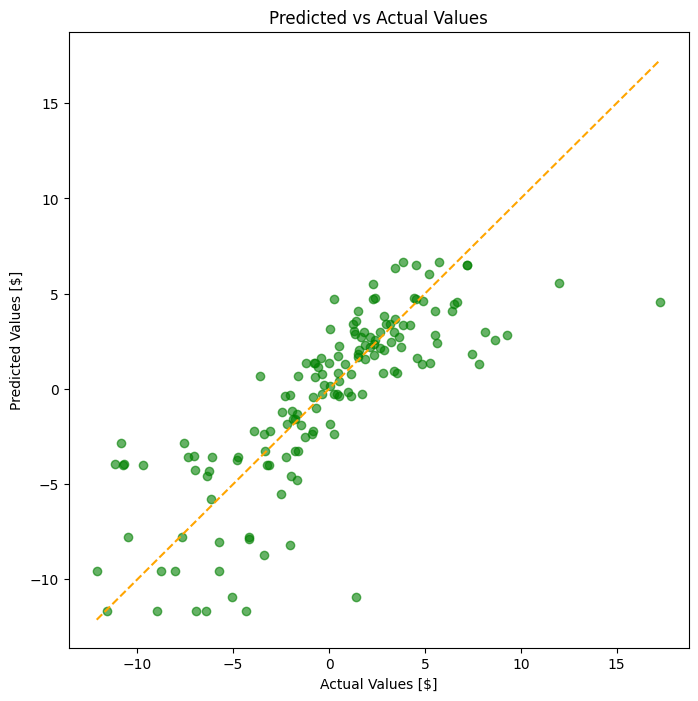

In [ ]:
# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test_array, test_predictions_array, alpha=0.6, color='green')
plt.plot([y_test_array.min(), y_test_array.max()], [y_test_array.min(), y_test_array.max()], color='orange', linestyle='--', linewidth=1.5)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values [$]')
plt.ylabel('Predicted Values [$]')
plt.show()

### Insights and Conclusions

After reading this report that we generated, an uniformed reader would have ample amount of information to feel informed about this project. We originally define our problem and explicitly state our original source of information. By introducing the SPY ETF as a representation of the S&P 500 and outlining the key variables such as daily opening, closing, high, and low prices, as well as trading volume—the reader gains an understanding of the dataset's importance. Through exploratory data analysis, we present in depth visualizations such as line graphs for price trends and volume fluctuations, box plots for outlier detection, and a correlation heatmap to uncover relationships between variables. These visuals are supported by detailed explanations that help a reader interpret patterns in the data, such as the stability of prices over time and the significance of volume spikes during major financial events. This ensures that even a reader unfamiliar with the technical aspects of stock data can grasp the insights.

Also, hypothesis testing (T-Test and ANOVA) is used in our analysis to evaluate the statistical significance of relationships within the dataset, such as the impact of year and close price on trading volume. These tests are introduced with clear null and alternative hypotheses, and the results are contextualized to highlight their practical implications, such as the stability of stock prices or the influence of global events on trading behavior. The report also delves into predictive modeling using decision tree regression, which is introduced as a tool for forecasting stock price changes. Thus, we provide clear instructions for each step of our analysis that the user (even who is not familiar with the topic) can follow. By explaining how these predictions can help inform smarter stock market decisions, we ensure the reader understands the practical application of our analysis.

If an informed reader were to read this document, they would definitely feel more informed about the SPY ETF and the U.S. market in general. While they may already be familiar with concepts like stock analysis and machine learning, the report provides detailed, context-specific information and applies these methods directly to SPY ETF data, offering deeper insights. The problem is clearly defined, and the dataset is well-documented, including its time frame, source, and key variables such as High-Low and Close-Open, which are derived for deeper analysis. Exploratory data analysis is presented through intuitive visualizations and statistical summaries, highlighting trends like price stability and volume fluctuations during major financial events, which even an informed reader would find valuable for their specificity and clarity. In addition to our in-depth analysis, we present the reader with hypothesis testing, correlation analysis, predictive modeling, and visualizations. These sections, along with visualizations comparing actual and predicted values, equips the informed reader with insights into the model’s performance and its implications. The report ends by synthesizing these findings, bridging technical analysis and practical decision-making, ensuring that even readers well-versed in these topics gain a richer and more nuanced understanding of SPY ETF data and its applications.

In this project, we sought to analyze the SPY ETF as a representation of the S&P 500, aiming to predict stock price changes using machine learning methods. By exploring historical stock data from Yahoo Finance (10/4/2021 - 10/1/2024), we applied various statistical analyses, visualizations, and a decision tree regression model to uncover meaningful patterns and predict future price changes.

Our findings indicate several key insights about the behavior of the SPY ETF over time. Exploratory data analysis revealed that while prices exhibited periods of stability and growth, volume trends were influenced by significant financial and geopolitical events. Outlier detection highlighted occasional spikes in trading volume, which were expected for an investment representing a large basket of companies. Correlation analysis showed strong relationships between price variables but an inverse correlation between volume and prices, suggesting that higher trading volumes often occurred during price dips. Through hypothesis testing, we confirmed that annual trends and close price categories significantly affect trading volume, reinforcing the influence of time and market conditions on investor behavior. The decision tree regression model was instrumental in predicting the daily Close-Open difference, leveraging historical data to make informed forecasts. While not perfect, the model demonstrated that it could capture underlying patterns and offer valuable predictive insights, with visualizations highlighting the model's accuracy and areas for improvement.

Overall, our findings suggest that machine learning, combined with robust statistical and exploratory analyses, can provide valuable insights into stock market behavior. This approach not only enhances our understanding of SPY ETF dynamics but also equips investors with data-driven tools to make smarter decisions. Future work could involve refining the model further, exploring alternative machine learning methods, and incorporating additional external factors such as macroeconomic indicators to improve prediction accuracy and deepen the analysis.